# 零基础入门Python爬虫系列
## 第四章 爬取58同城在售楼盘房源信息

　ID：wlong
　数据分析爱好者、目前小白一枚
　邮箱：wlong826@163.com
　CSDN：[【数分小白龙】](https://blog.csdn.net/qq_38230663?spm=1001.2014.3001.5343)
　如果有不完善的地方，欢迎小伙伴评论区留言！
　最近博客、和鲸每周都会有所更新，欢迎大家**关注点赞分享**哦！
 
 ----
 
 　本文的CSDN链接：[Python之爬取58同城在售楼盘房源信息](https://blog.csdn.net/qq_38230663/article/details/117019059)

　　上一篇博客以爬取**《你好，李焕英》**豆瓣热门短评来作为爬虫入门小案例，这一篇博客主要以**石家庄市**为例，爬取58同城在售楼盘房源信息，主要包括以下字段：**小区名称，所在区，地址以及均价**等，总体来说，难度系数不大，算是入门级第二个小案例，废话不多说，让我们一起去看看把；
	
　　从58同城石家庄市新房首页可以看出，总共显示**696个**楼盘，但是有些楼盘并不是在售状态，售价还没公布，所以为了数据爬取完整，增加**两个筛选条件（在售，住宅）**，如下图所示。从图中可以看到，筛选后满足条件的楼盘共有**221个**，每页有**60个**楼盘，一共需要爬取**4页**，我们的**任务**就是：爬取到这221个在售楼盘的相关字段信息；
    
![image.png](https://img-blog.csdnimg.cn/20210520081249746.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM4MjMwNjYz,size_16,color_FFFFFF,t_70)
  

# 1. 获取58同城石家庄市在售楼盘URL

　　为了方便查看起见，这次将前4页URL放在一起进行比较；

In [1]:
url1 = 'https://sjz.58.com/xinfang/loupan/all/a1_w1/' # 第一页
url2 = 'https://sjz.58.com/xinfang/loupan/all/a1_p2_w1/?PGTID=0d0091a8-000f-1266-1fca-62399388c79c&ClickID=1' # 第二页
url3 = 'https://sjz.58.com/xinfang/loupan/all/a1_p3_w1/?PGTID=0d0091a8-000f-1c31-0cc2-4fa1844adb62&ClickID=1' # 第三页
url4 = 'https://sjz.58.com/xinfang/loupan/all/a1_p4_w1/?PGTID=0d0091a8-000f-1aa1-0444-a8d210a73004&ClickID=1' # 第四页

　　从4页的URL中，我们可以看到每个URL后都携带了两个参数：PGTID和ClickID，由于我没有专门学过网页开发，所以关于第一次参数PGTID也不是很清楚，第二次参数ClickID似乎与点击次数有关，当然这两个参数具体含义不知道也没关系，可以试试把他们删掉，然后却发现带不带后面两个参数并不影响最终的网页页面。其实，好多网站URL后面携带的参数，对于普通用户没有必要全都知道，我们只需要知道一些常用参数即可。
	
　　在删除后面PGTID和ClickID参数后，我们可以看到后3页唯一不同的就是p2，p3，p4，这肯定就代表着页数；所以我们得出第一页肯定就是p1，只不过系统自动隐藏了。故本案例的URL即：
	

In [2]:
# 首页
url = 'https://sjz.58.com/xinfang/loupan/all/a1_p1_w1/'
 
# 爬取石家庄市所有在售楼盘221个
for i in range(4):
    url = 'https://sjz.58.com/xinfang/loupan/all/a1_p{}_w1/'.format(i)

# 2.分析网页html代码，查看各字段信息所在的网页位置

　　在网页空白处右键，选择【检查】，即可查看网页详细的源代码；
  
  ![image.png](https://img-blog.csdnimg.cn/20210520085650698.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM4MjMwNjYz,size_16,color_FFFFFF,t_70)
  
  ![image-2.png](https://img-blog.csdnimg.cn/20210520090005496.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM4MjMwNjYz,size_16,color_FFFFFF,t_70)
  

# 3.利用Xpath解析网页拿到相应字段的值

## （1）小区名称

In [ ]:
communityName = tree.xpath("//div[@class='item-mod ']//a[@class='lp-name']/span/text()")

## （2）所在区及地址
　　注：由于所在区和地址这两个字段是放在同一个html标签下的，所以爬取的是一个长字符串，然后我们在对这一字符串进行截取，得到所在区和地址字段；

- **① 获取长字符串**

In [ ]:
detailAddress = tree.xpath("//div[@class='item-mod ']//a[@class='address']/span/text()")

　　长字符串数据如下：\xa0表示不间断空白符（&nbsp），占一个位置；
  ![image.png](https://img-blog.csdnimg.cn/20210520091107808.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM4MjMwNjYz,size_16,color_FFFFFF,t_70)

- **② 获取所在区字段**
　　所在区字段获取方法：遍历长字符串列表，获取第2,3位置上的元素即为区；

In [ ]:
district = [x[2:4] for x in detailAddress]

- **③ 获取地址字段**
　　地址字段获取方法：遍历长字符串列表，以']'作为分隔符，用split函数进行分割，然后取分割后的第2个元素；由于地址前带空格，所以需取[1:]，去除\xa0；

In [ ]:
address = [x.split(']')[1][1:] for x in detailAddress]

## （3）均价

　　**注意**：由于有的楼盘售价待定，只显示周边均价，当我们在html源码中找到相应位置时，发现**均价**和**售价待定**显示周边均价这两个所在标签的属性值是不一样的，一个属性值是**price**，一个属性值是**favor-tag around-price**。于是，当我们爬取时只爬取了price属性值下的数据，结果会发现数据量不够，一页少于60个，就说明我们在爬取过程中遗漏数据了。所以，在爬取时，要把两种不同属性值的P标签都考虑在内，如何都考虑在内呢？
  
  ![image.png](https://img-blog.csdnimg.cn/20210520092722148.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM4MjMwNjYz,size_16,color_FFFFFF,t_70)

　　在定义P标签的属性值的时候，可以加一个**or关键字**，代表**或者**，这就将两个不同属性值下的P标签数据都考虑在内了。

In [ ]:
price = tree.xpath("//a[@class='favor-pos']/p[@class='price' or 'favor-tag around-price']/span/text()")

　　**Tips**：上述这种情况，我们在爬取的过程中，不可能一下子就可以想到，这需要不断去尝试，可能首先我们想到的就是一个Price属性值，在爬取完数据后，发现数据量不够，这时就需要反过来想一想问题原因，是不是标签不同、属性值不同等等，然后多去尝试发现问题，不断优化自己爬虫代码，最终总会找到解决方法的！当遇到这种问题多了，相信我们就能迎刃而解了！

# 4. 爬取首页在售楼盘信息

　　**Tips**：一般情况下，我首先都会考虑爬取首页的内容，当首页内容所有字段信息都爬取无误后，再去加循环爬取多页内容。、
  
　　在这里，爬取首页内容的话，建议使用jupyter notebook来编写代码，方便查看每一步的运行结果，如果小伙伴有基础的话，可以直接跳过看最后的爬取所有数据的总代码。

## （1）导包：

In [ ]:
from lxml import etree
import requests
from fake_useragent import UserAgent
import random
import time
import csv

## （2）创建文件对象

In [ ]:
f = open('58同城石家庄市在售楼盘信息_首页.csv', 'w', encoding='utf-8-sig', newline="")  # 创建文件对象
csv_write = csv.DictWriter(f, fieldnames=['小区名称', '所在区', '地址', '均价'])
csv_write.writeheader() # 写入文件头

## （3）请求头参数设置：User-Agent, cookie, referer

　　**注**：代理IP池涉及到搭建Redis数据库环境，如果**有代码基础**的小伙伴，可以看下我这篇博客（[Python之反爬虫手段](https://blog.csdn.net/qq_38230663/article/details/116830990?spm=1001.2014.3001.5501)），**尝试着去搭建代理IP池的环境**；对于**刚开始学习**爬虫的小伙伴，搭配IP代理池环境可能稍微**有点难度**，这里我建议呢，可以先把代理IP的代码**删掉**（两处地方需删除：一个是**get_proxy()函数**，一个是**requests.get()函数**中的proxies参数），删除后代码也是可以正常运行的。


In [ ]:
# 设置请求头参数：User-Agent, cookie, referer
headers = {
    # 随机生成User-Agent
    'User-Agent' : UserAgent().random,
    # 不同用户不同时间访问，cookie都不一样，根据自己网页的来，获取方法见Python之反爬虫手段
    'cookie' : 'aQQ_ajkguid=B5CCB12E-A8AD-0CC9-B334-SX1103123858; id58=c5/nfF+g3uI23qgLBCclAg==; 58tj_uuid=dcb06d7d-51a2-4b26-90aa-8baac32a3e7f; als=0; wmda_new_uuid=1; wmda_uuid=6dc5ee3adc28cf98ac1224f148a9ba1e; wmda_visited_projects=%3B1731916484865%3B11187958619315; xxzl_deviceid=BvPYN%2BrmBSpF09z8JqD48kbjMX25SxYggu6fvr5I9s4rgftPltdgVswjgbFScU1%2B; Hm_lvt_b4a22b2e0b326c2da73c447b956d6746=1606903361; myfeet_tooltip=end; Hm_lpvt_3f405f7f26b8855bc0fd96b1ae92db7e=1621390301; Hm_lvt_3f405f7f26b8855bc0fd96b1ae92db7e=1621042114,1621390301; ipcity=sjz%7C%u77F3%u5BB6%u5E84; is_58_pc=1; sessid=3A927625-9044-4C6A-6EFB-SX0519101211; 58_ctid=241; commontopbar_new_city_info=28%7C%E7%9F%B3%E5%AE%B6%E5%BA%84%7Csjz; ctid=28; 58home=sjz; city=sjz; xxzl_cid=e8545a9bccc843cab22d3dd387609f97; xzuid=cea1cb7a-7906-4f5e-acd7-2c65795a73a3; new_uv=28; utm_source=; spm=; init_refer=; new_session=0; lp_lt_ut=9d008251d24b48af6822316ab7e6be74; __xsptplusUT_8=1; __xsptplus8=8.25.1621410026.1621412599.13%234%7C%7C%7C%7C%7C%23%23JSCZo2LDIo3u-jFNolPpaCRq8RF4yIzi%23',
    # 设置从何处跳转过来
    'referer': 'https://sjz.58.com/xinfang/loupan/all/a1_p1_w1/',
}
 
# 从代理IP池，随机获取一个IP，比如必须ProxyPool项目在运行中
# 对于刚开始学习爬虫并且没有代码基础的，可以先删除此函数
def get_proxy():
    try:
        PROXY_POOL_URL = 'http://localhost:5555/random'
        response = requests.get(PROXY_POOL_URL)
        if response.status_code == 200:
            return response.text
    except ConnectionError:
        return None

## （4）数据解析

In [ ]:
# 首页网址URL
url = 'https://sjz.58.com/xinfang/loupan/all/a1_p1_w1/'
# 请求发送
page_text = requests.get(url=url, headers=headers, proxies={"http": "http://{}".format(get_proxy())}).text
#数据解析
tree = etree.HTML(page_text)
 
# 小区名称
communityName = tree.xpath("//div[@class='item-mod ']//a[@class='lp-name']/span/text()")
# 详细地址
detailAddress = tree.xpath("//div[@class='item-mod ']//a[@class='address']/span/text()")
# 所在区
district = [x[2:4] for x in detailAddress]
# 地址
address = [x.split(']')[1][1:] for x in detailAddress]
# 均价
price = tree.xpath("//a[@class='favor-pos']/p[@class='price' or 'favor-tag around-price']/span/text()")

## （5）将爬取到的数据写入文件

In [ ]:
for j in range(len(communityName)): #每页60个在售楼盘，最后一页不到60个
    data_dict = {'小区名称':communityName[j], '所在区':district[j], '地址':address[j], '均价':int(price[j])}
    csv_write.writerow(data_dict)

# 5. 爬取全部数据完整代码解析

In [ ]:
## 导包
from lxml import etree
import requests
from fake_useragent import UserAgent
import random
import time
import csv
 
## 创建文件对象
f = open('58同城石家庄在售楼盘信息_221个.csv', 'w', encoding='utf-8-sig', newline="")  # 创建文件对象
csv_write = csv.DictWriter(f, fieldnames=['小区名称', '所在区', '地址', '均价'])
csv_write.writeheader() # 写入文件头
 
## 设置请求头参数：User-Agent, cookie, referer
headers = {
    # 随机生成User-Agent
    'User-Agent' : UserAgent().random,
    # 不同用户不同时间访问，cookie都不一样，根据自己网页的来，获取方法见另一篇博客：Python之反爬虫手段
    'cookie' : 'aQQ_ajkguid=B5CCB12E-A8AD-0CC9-B334-SX1103123858; id58=c5/nfF+g3uI23qgLBCclAg==; 58tj_uuid=dcb06d7d-51a2-4b26-90aa-8baac32a3e7f; als=0; wmda_new_uuid=1; wmda_uuid=6dc5ee3adc28cf98ac1224f148a9ba1e; wmda_visited_projects=%3B1731916484865%3B11187958619315; xxzl_deviceid=BvPYN%2BrmBSpF09z8JqD48kbjMX25SxYggu6fvr5I9s4rgftPltdgVswjgbFScU1%2B; Hm_lvt_b4a22b2e0b326c2da73c447b956d6746=1606903361; myfeet_tooltip=end; Hm_lpvt_3f405f7f26b8855bc0fd96b1ae92db7e=1621390301; Hm_lvt_3f405f7f26b8855bc0fd96b1ae92db7e=1621042114,1621390301; ipcity=sjz%7C%u77F3%u5BB6%u5E84; is_58_pc=1; sessid=3A927625-9044-4C6A-6EFB-SX0519101211; 58_ctid=241; commontopbar_new_city_info=28%7C%E7%9F%B3%E5%AE%B6%E5%BA%84%7Csjz; ctid=28; 58home=sjz; city=sjz; xxzl_cid=e8545a9bccc843cab22d3dd387609f97; xzuid=cea1cb7a-7906-4f5e-acd7-2c65795a73a3; new_uv=28; utm_source=; spm=; init_refer=; new_session=0; lp_lt_ut=9d008251d24b48af6822316ab7e6be74; __xsptplusUT_8=1; __xsptplus8=8.25.1621410026.1621412599.13%234%7C%7C%7C%7C%7C%23%23JSCZo2LDIo3u-jFNolPpaCRq8RF4yIzi%23',
    # 设置从何处跳转过来
    'referer': 'https://sjz.58.com/xinfang/loupan/all/a1_p1_w1/',
}
 
## 从代理IP池，随机获取一个IP，比如必须ProxyPool项目在运行中
def get_proxy():
    try:
        PROXY_POOL_URL = 'http://localhost:5555/random'
        response = requests.get(PROXY_POOL_URL)
        if response.status_code == 200:
            return response.text
    except ConnectionError:
        return None

## 总共筛选出221个在售楼盘，每页有60个楼盘，需爬取4页
for i in range(4):
    # 遍历url
    url = 'https://sjz.58.com/xinfang/loupan/all/a1_p{}_w1/'.format(i)
    # 请求发送
    page_text = requests.get(url=url, headers=headers, proxies={"http":"http://{}".format(get_proxy())}).text
    # 数据解析
    tree = etree.HTML(page_text)
 
    # 获取小区名称字段
    communityName = tree.xpath("//div[@class='item-mod ']//a[@class='lp-name']/span/text()")
    # 获取长字符串
    detailAddress = tree.xpath("//div[@class='item-mod ']//a[@class='address']/span/text()")
    # 获取所在区字段
    district = [x[2:4] for x in detailAddress]
    # 获取地址字段
    address = [x.split(']')[1][1:] for x in detailAddress]
    # 获取均价字段
    price = tree.xpath("//a[@class='favor-pos']/p[@class='price' or 'favor-tag around-price']/span/text()")
 
    # 将数据读入csv文件
    for j in range(len(communityName)): #每页60个在售楼盘，最后一页不到60个
        data_dict = {'小区名称':communityName[j], '所在区':district[j], '地址':address[j], '均价':int(price[j])}
        csv_write.writerow(data_dict)
    
    print('第{}页爬取成功'.format(i+1))
    
    #设置睡眠时间间隔，防止频繁访问网站
    time.sleep(random.randint(5, 10)) 
    
print('-------------')
print('全部爬取成功！')

# 6. 部分数据展示

　　最终爬取到的数据如下表所示：

![image.png](https://img-blog.csdnimg.cn/20210520115152700.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM4MjMwNjYz,size_16,color_FFFFFF,t_70)

----

　　好了，到此本文的爬虫工作就差不多结束了，主要利用了Python中的Xpath去爬取**58同城石家庄市在售楼盘**的相关字段信息，整体来说，该案例相比上一篇博客在数据解析部分稍微提高了点难度，但总体来说，也算是入门级第二个小案例，只要小伙伴多翻阅资料，加深理解相应知识点，一定可以掌握的！后续博客计划爬取**安居客二手房信息、安居客二手房详情页数据信息、百度地图POI数据、大众点评**等，如果小伙伴有兴趣的话，可以来波关注下，嘿嘿！

　　如果哪里有介绍的不是很全面的地方，欢迎小伙伴在评论区留言，我会不断完善的！
  
----

![Image Name](https://cdn.kesci.com/upload/image/qudcguzd5q.png?imageView2/0/w/960/h/960)

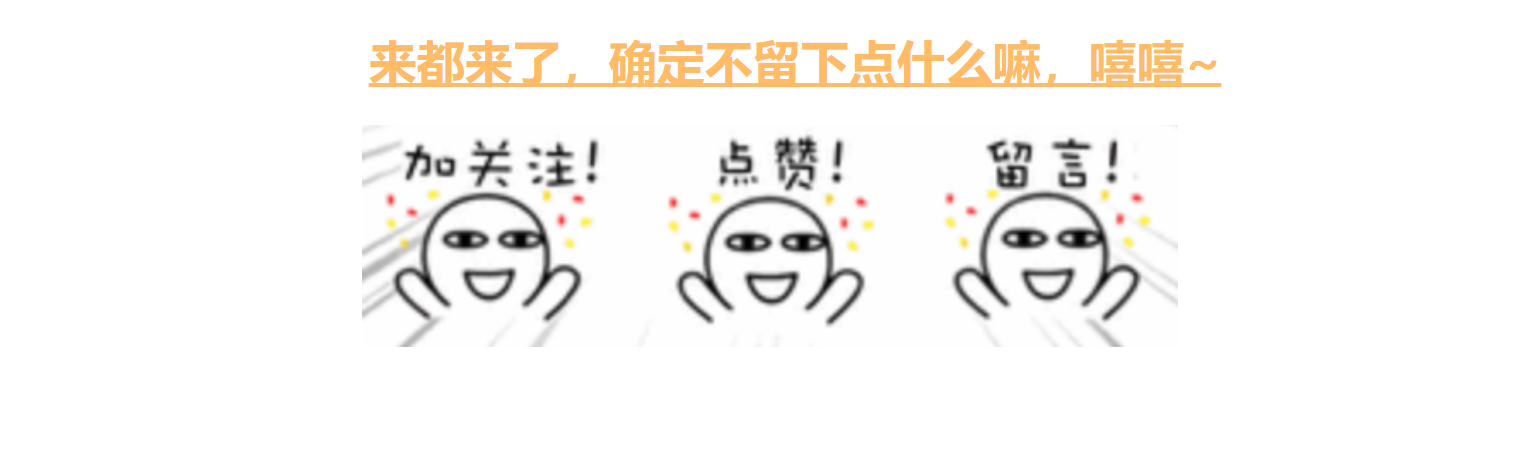